# Test Analysis

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error
    
import mydata
import performance
from performance import PerformanceMeasure, PerformanceOptimisation
from bayes import BayesianRegression

# UTKFace

In [2]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_test_efficientnet_novel.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_test_resnet_novel.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_test_vgg_novel.csv", True)

In [3]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

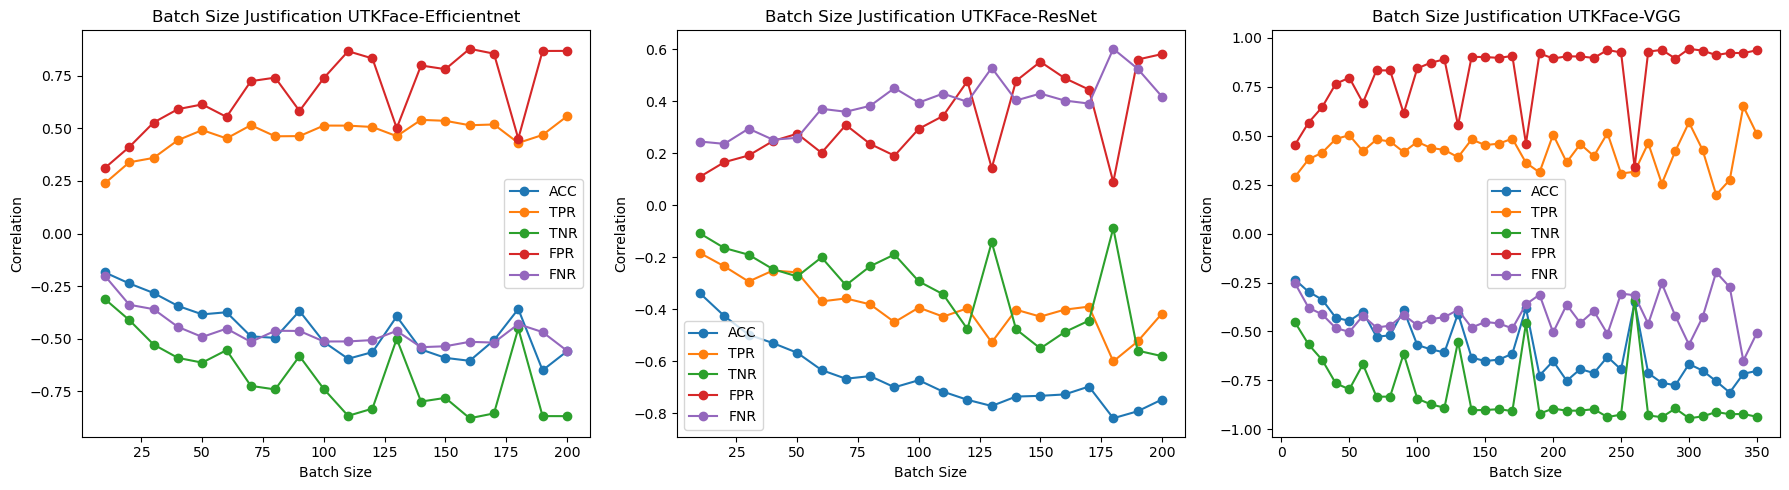

In [4]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [5]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=100)
po_resnet.check_optimal_batch_correlation(batch_size=100)
po_vgg.check_optimal_batch_correlation(batch_size=100)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.514728  0.512525 -0.738059  0.738059 -0.512525
ACC      -0.514728  1.000000  0.322621  0.704290 -0.704290 -0.322621
TPR       0.512525  0.322621  1.000000 -0.282257  0.282257 -1.000000
TNR      -0.738059  0.704290 -0.282257  1.000000 -1.000000  0.282257
FPR       0.738059 -0.704290  0.282257 -1.000000  1.000000 -0.282257
FNR      -0.512525 -0.322621 -1.000000  0.282257 -0.282257  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.673074 -0.394016 -0.293203  0.293203  0.394016
ACC      -0.673074  1.000000  0.850871  0.395011 -0.395011 -0.850871
TPR      -0.394016  0.850871  1.000000 -0.038336  0.038336 -1.000000
TNR      -0.293203  0.395011 -0.038336  1.000000 -1.000000  0.038336
FPR       0.293203 -0.395011  0.038336 -1.000000  1.000000 -0.038336
FNR       0.394016 -0.850871 -1.000000  0.038336 -0.038336  1.000000
          distance       ACC      

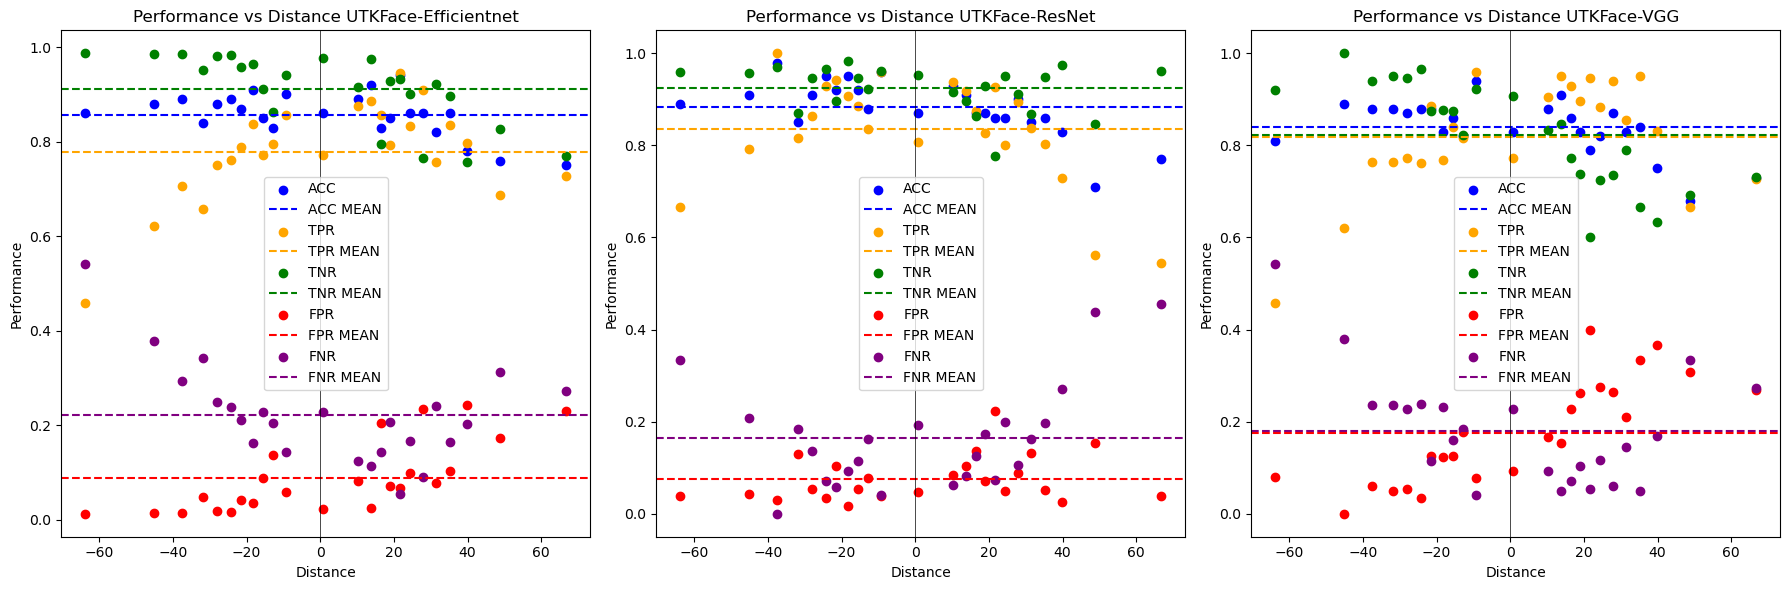

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

# CelebA

In [7]:
db = "CelebA"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet_novel.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet_novel.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg_novel.csv", True)

In [8]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

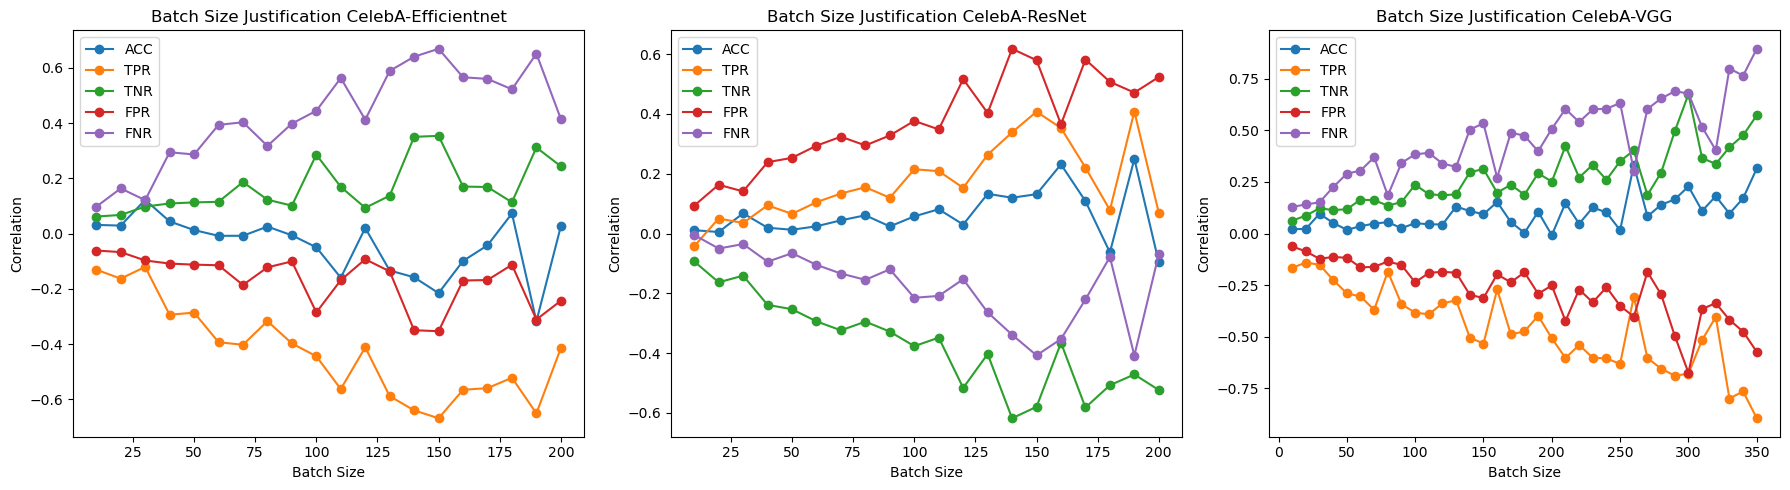

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [10]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=100)
po_resnet.check_optimal_batch_correlation(batch_size=100)
po_vgg.check_optimal_batch_correlation(batch_size=100)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.049823 -0.444220  0.285539 -0.285539  0.444220
ACC      -0.049823  1.000000  0.773252  0.423583 -0.423583 -0.773252
TPR      -0.444220  0.773252  1.000000 -0.191247  0.191247 -1.000000
TNR       0.285539  0.423583 -0.191247  1.000000 -1.000000  0.191247
FPR      -0.285539 -0.423583  0.191247 -1.000000  1.000000 -0.191247
FNR       0.444220 -0.773252 -1.000000  0.191247 -0.191247  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000  0.057384  0.214991 -0.376821  0.376821 -0.214991
ACC       0.057384  1.000000  0.882261  0.521773 -0.521773 -0.882261
TPR       0.214991  0.882261  1.000000  0.102706 -0.102706 -1.000000
TNR      -0.376821  0.521773  0.102706  1.000000 -1.000000 -0.102706
FPR       0.376821 -0.521773 -0.102706 -1.000000  1.000000  0.102706
FNR      -0.214991 -0.882261 -1.000000 -0.102706  0.102706  1.000000
          distance       ACC      

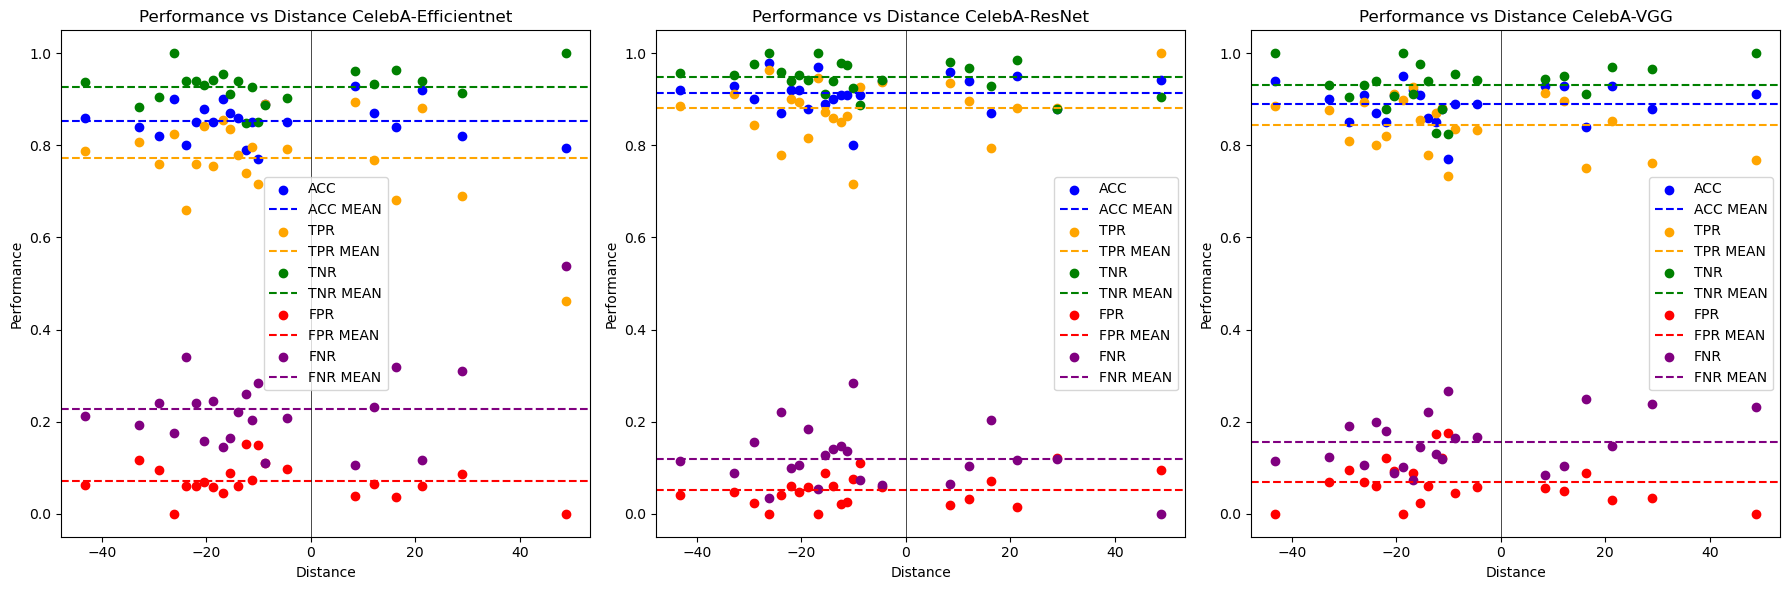

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

# HAM10000

In [12]:
db = "HAM"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet_novel.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet_novel.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg_novel.csv", True)

In [13]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

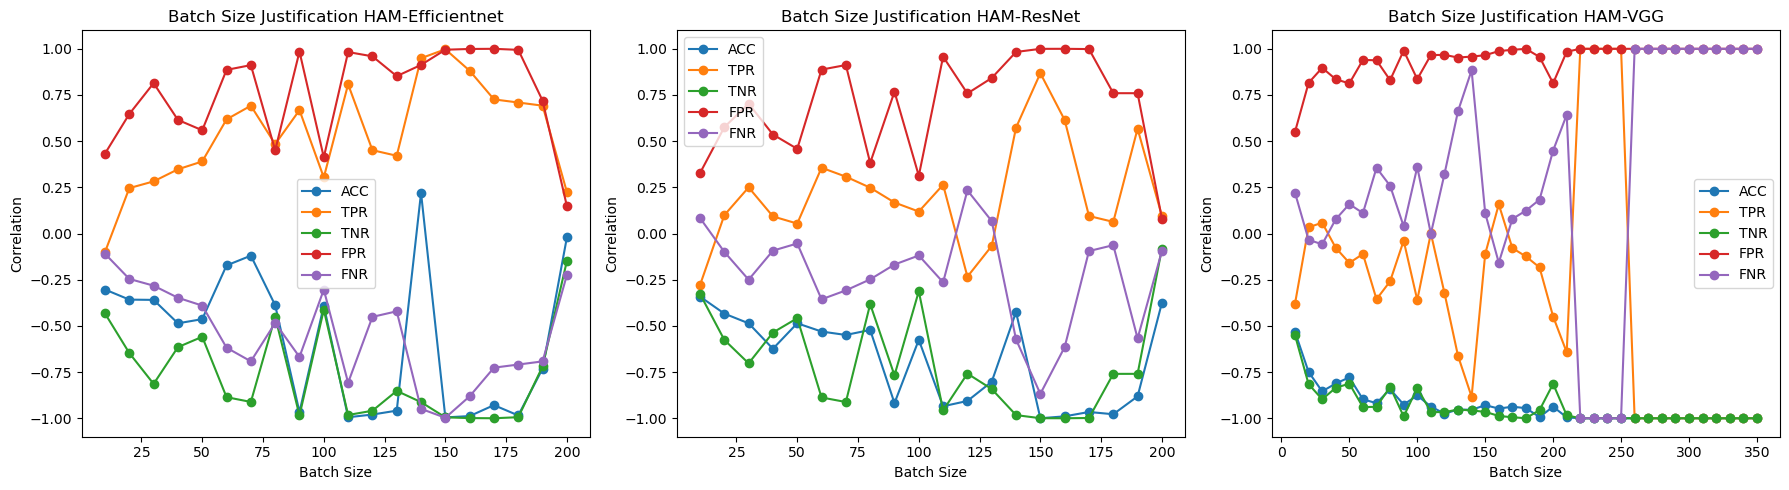

In [14]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [15]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=50)
po_resnet.check_optimal_batch_correlation(batch_size=50)
po_vgg.check_optimal_batch_correlation(batch_size=50)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.463126  0.389809 -0.558495  0.558495 -0.389809
ACC      -0.463126  1.000000 -0.170016  0.894161 -0.894161  0.170016
TPR       0.389809 -0.170016  1.000000 -0.558322  0.558322 -1.000000
TNR      -0.558495  0.894161 -0.558322  1.000000 -1.000000  0.558322
FPR       0.558495 -0.894161  0.558322 -1.000000  1.000000 -0.558322
FNR      -0.389809  0.170016 -1.000000  0.558322 -0.558322  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.485862  0.053887 -0.458340  0.458340 -0.053887
ACC      -0.485862  1.000000  0.530177  0.867893 -0.867893 -0.530177
TPR       0.053887  0.530177  1.000000  0.068696 -0.068696 -1.000000
TNR      -0.458340  0.867893  0.068696  1.000000 -1.000000 -0.068696
FPR       0.458340 -0.867893 -0.068696 -1.000000  1.000000  0.068696
FNR      -0.053887 -0.530177 -1.000000 -0.068696  0.068696  1.000000
          distance       ACC      

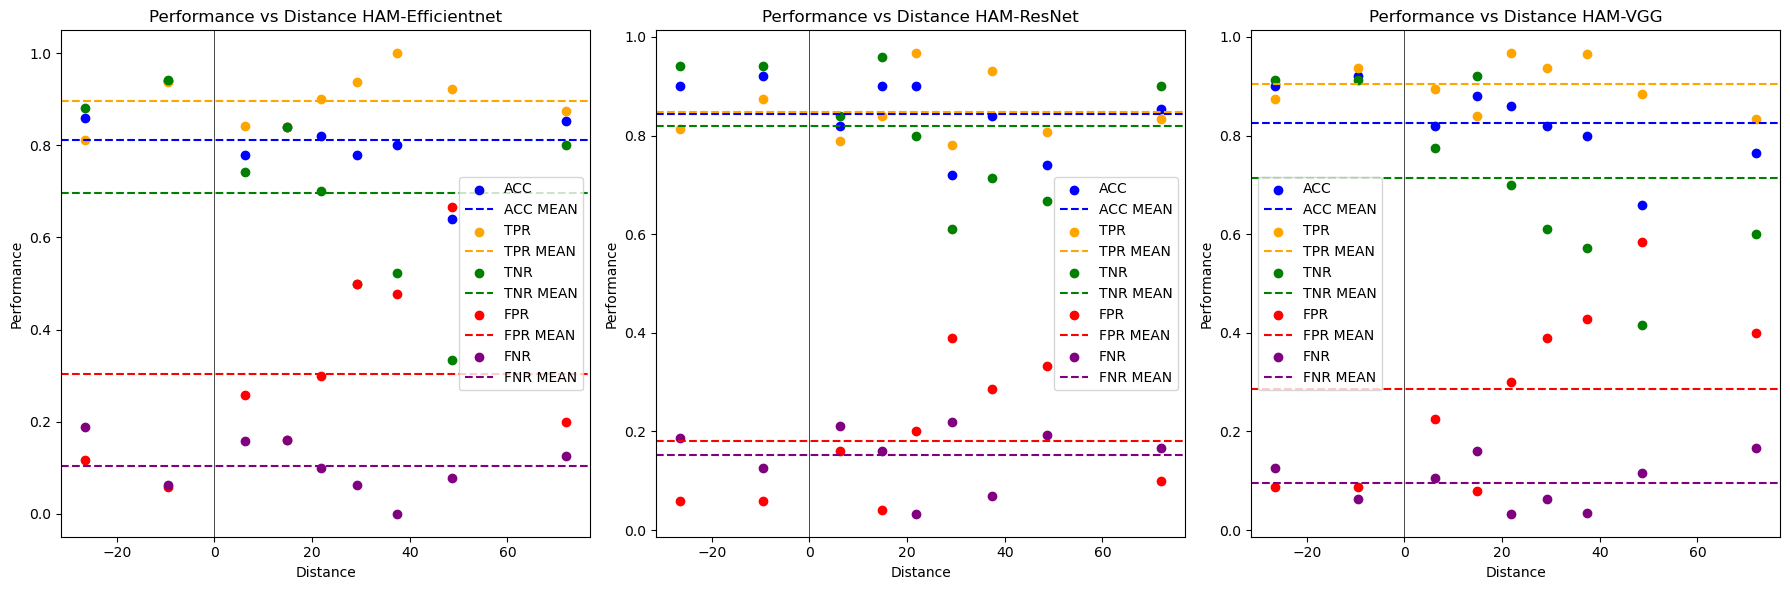

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()